# MNIST digit classification before and after shuffling


**Goal:** In this notebook you will see in an classification task, that the order of the input data for a fully connected networks (fcNN) does not matter (because every node is connected to every other in the next layer). This is different when you use a convolutional neural network (CNN), the local structure is important for its perfomance 

**Dataset:** You work with the MNIST dataset. We have 60'000 28x28 pixel greyscale images of digits and want to classify them into the right label (0-9).


# Load the data


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers


## Loading and preparing the MNIST data

### Loading the MNIST data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Let's visualize some first mnist images before shuffling the pixels randomly around. 

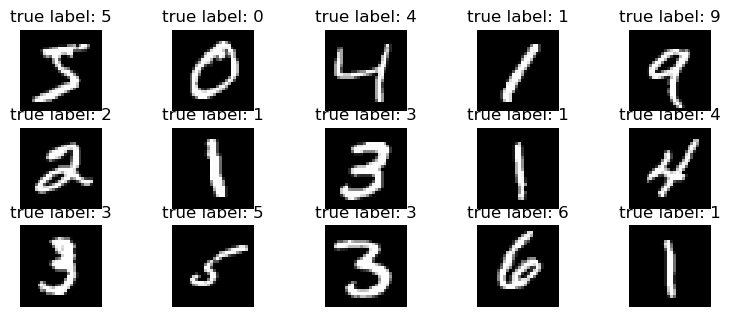

In [3]:
n_rows = 3
n_cols = 5
plt.figure(figsize=(n_cols * 1.9, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow((X_train[index,:,:,0]),cmap="gray")
        plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[index]))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2) #adjust the figure sizes to archieve the desired wspace and hspace 
plt.show()    

In the next cell we shuffle the pixel of each image randomly around. Note that we shuffle every image in same manner!

In [4]:
# function to shuffle the pixel order within an image
# used to shuffel the pixels of all mnist images in the same manner
def shuffel_pixels(idx, data):
  data_new=np.zeros((data.shape))
  for i,img in enumerate(data):
    data_new[i] = img.flatten()[idx].reshape((28,28,1))
  return data_new

np.random.seed(42)
shuffel_idx = np.random.permutation(np.arange(28*28))
X_train_shuffle = shuffel_pixels(shuffel_idx, X_train)
X_val_shuffle = shuffel_pixels(shuffel_idx, X_val)
X_test_shuffle = shuffel_pixels(shuffel_idx, X_test)

Let's visualize some first images after shuffling the pixels randomly around. Now as a human you have no chance to recognise the true label of the digits.

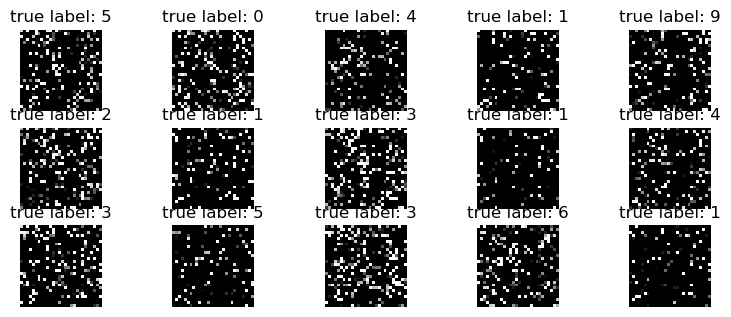

In [6]:
# Visualize the data after shuffling image-pixels    
n_rows = 3
n_cols = 5
plt.figure(figsize=(n_cols * 1.9, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow((X_train_shuffle[index,:,:,0]),cmap="gray")
        plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[index]))
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2) #adjust the figure sizes to archieve the desired wspace and hspace 
plt.show()  

# fcNN as classification model for MNIST data
Now we want to train a fcNN to classify the MNIST data. We use the same netwok architecture and train first with the original data and then with the shuffled data. 
* Use a fcNN with 2 hidden layers as classification model.
* train it once on the original train data and check the performance on the original test data
* train it once on the shuffeled train data and check the performance on the accordingly shuffled test data

Because we will use fcNN we need to flatten our inuput into a 1d vector. We do this in the next cell with reshape.

In [7]:
# prepare data for fcNN - we need a vector as input

# first do it for original data
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

# then do it for the shuffled data
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])

## Define a fully_connected Neural Network model 

In [13]:
# Step 1: define fcNN_model with 2 hidden layers with number of units are 100 and 50
np.random.seed(35675)
tf.random.set_seed(1352)
#  One way to define the fcNN_model
# fcNN_model = Sequential()
# fcNN_model.add(Dense(100, batch_input_shape=(None, 784)))
# fcNN_model.add(Activation('sigmoid'))
# fcNN_model.add(Dense(50))
# fcNN_model.add(Activation('sigmoid'))
# fcNN_model.add(Dense(10))
# fcNN_model.add(Activation('softmax'))

# I prefer this way to define the fcNN_model, will create the same fcNN_model as above. 
# Note that when you use this way, then run the fcNN_model.summary(), it will produce errors, 
# you can only run it without error after fiting with a training set.
# Dont worry, it does not affect how the model perform, it just a comment to show the architecture of your NN model

fcNN_model = keras.Sequential([
   Dense(100, batch_input_shape=(None, 784), activation = 'sigmoid'),
   Dense(50, activation='sigmoid'),
   Dense(10, activation='sigmoid')
])

# Step2: compile model and intitialize weights
fcNN_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# summarize model along with number of model weights
fcNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
____________________________________________________

## Train+evaluate the fcNN on the original data 

In [14]:
# check the shape
X_train_flat.shape,Y_train.shape,X_val_flat.shape,Y_val.shape

((50000, 784), (50000, 10), (10000, 784), (10000, 10))

Here we define the nework, we use two hidden layers with 100 and 50 nodes. In the output we predict the probability for the 10 digits with the softmax actication function, in the hidden layers we use the sigmoid activation function. 

In [15]:
# train the model
history=fcNN_model.fit(X_train_flat, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val_flat, Y_val)
                 )

Epoch 1/10
391/391 - 17s - loss: 1.0506 - accuracy: 0.7577 - val_loss: 0.4094 - val_accuracy: 0.9087
Epoch 2/10
391/391 - 1s - loss: 0.3431 - accuracy: 0.9126 - val_loss: 0.2602 - val_accuracy: 0.9291
Epoch 3/10
391/391 - 1s - loss: 0.2499 - accuracy: 0.9301 - val_loss: 0.2084 - val_accuracy: 0.9420
Epoch 4/10
391/391 - 1s - loss: 0.2026 - accuracy: 0.9429 - val_loss: 0.1807 - val_accuracy: 0.9495
Epoch 5/10
391/391 - 1s - loss: 0.1711 - accuracy: 0.9510 - val_loss: 0.1559 - val_accuracy: 0.9561
Epoch 6/10
391/391 - 1s - loss: 0.1468 - accuracy: 0.9578 - val_loss: 0.1433 - val_accuracy: 0.9591
Epoch 7/10
391/391 - 1s - loss: 0.1269 - accuracy: 0.9633 - val_loss: 0.1278 - val_accuracy: 0.9623
Epoch 8/10
391/391 - 1s - loss: 0.1112 - accuracy: 0.9685 - val_loss: 0.1177 - val_accuracy: 0.9655
Epoch 9/10
391/391 - 1s - loss: 0.0975 - accuracy: 0.9728 - val_loss: 0.1097 - val_accuracy: 0.9679
Epoch 10/10
391/391 - 1s - loss: 0.0864 - accuracy: 0.9758 - val_loss: 0.1060 - val_accuracy: 0.969

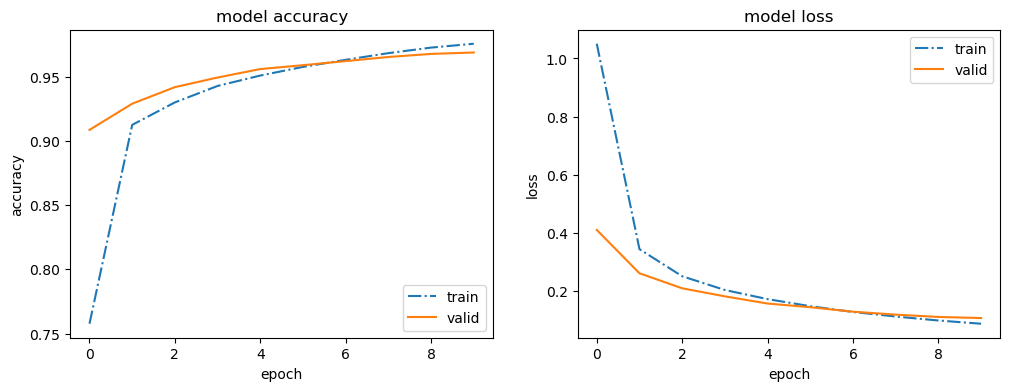

In [20]:
# plot the development of the accuracy and loss during training
# We will use the same fucntion here to draw the training-validation accuraccy and loss when fit the same fcNN_model 
# with shuffled-pixels data leter on 
def draw_hist_f(history):
    """hist: a history learning curve created by a model.fit where model is a CNN model"""
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,(1))
    plt.plot(history.history['accuracy'],linestyle='-.')
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='lower right')
    plt.subplot(1,2,(2))
    plt.plot(history.history['loss'],linestyle='-.')
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    
draw_hist_f(history)

Now, let's use the fcNN_model that was trained on the original data to predict the testdata.
We determine the confusion matrix and the accuracy on the testdata to evaluate the classification performance.

In [16]:
def evaluate_predictions_f(model, Xtest, Ytest):
    """
    model: a deeplearning model, can be fully-connected_NN or CNN 
    Xtest: a (flattened) test input data
    Ytest"""
    pred=model.predict(Xtest)
    print(confusion_matrix(np.argmax(Ytest,axis=1),np.argmax(pred,axis=1)))
    acc_fc_orig = np.sum(np.argmax(Ytest,axis=1)==np.argmax(pred,axis=1))/len(pred)
    print("Acc_fc_orig_flat = " , acc_fc_orig)
# Call the evaluate_predictions_f function 
evaluate_predictions_f(fcNN_model, X_test_flat,Y_test )   

[[ 962    0    2    1    0    4    9    1    1    0]
 [   0 1122    3    1    0    1    4    0    4    0]
 [   6    2  995    4    4    2    4    7    7    1]
 [   0    0    8  980    1    3    0    7    8    3]
 [   1    0    2    0  952    0    8    2    2   15]
 [   4    1    1   14    2  849    9    1    7    4]
 [   5    2    0    1    4    4  939    0    3    0]
 [   1    6   13    2    0    1    0  992    1   12]
 [   4    2    7   13    5    8    3    4  925    3]
 [   4    5    2    9   19    3    1    5    5  956]]
Acc_fc_orig_flat =  0.9672


### Train+evaluate the fcNN on the shuffled data

In [17]:
# check the shape
X_train_shuffle_flat.shape,Y_train.shape,X_val_shuffle_flat.shape,Y_val.shape

((50000, 784), (50000, 10), (10000, 784), (10000, 10))

Here we define the nework, we use two hidden layers with 100 and 50 nodes. In the output we predict the probability for the 10 digits with the softmax actication function, in the hidden layers we use the sigmoid activation function. 

In [42]:
# define fcNN with 2 hidden layers
# We don't need to redefine the fcNN_model again, just need to fit the fcNN_model with our new data

In [18]:
# train the model
history2=fcNN_model.fit(X_train_shuffle_flat, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val_shuffle_flat, Y_val))

Epoch 1/10
391/391 - 1s - loss: 0.4210 - accuracy: 0.8786 - val_loss: 0.1965 - val_accuracy: 0.9440
Epoch 2/10
391/391 - 1s - loss: 0.1875 - accuracy: 0.9442 - val_loss: 0.1560 - val_accuracy: 0.9544
Epoch 3/10
391/391 - 1s - loss: 0.1492 - accuracy: 0.9564 - val_loss: 0.1330 - val_accuracy: 0.9637
Epoch 4/10
391/391 - 1s - loss: 0.1255 - accuracy: 0.9632 - val_loss: 0.1262 - val_accuracy: 0.9626
Epoch 5/10
391/391 - 1s - loss: 0.1083 - accuracy: 0.9693 - val_loss: 0.1145 - val_accuracy: 0.9675
Epoch 6/10
391/391 - 1s - loss: 0.0947 - accuracy: 0.9735 - val_loss: 0.1062 - val_accuracy: 0.9687
Epoch 7/10
391/391 - 1s - loss: 0.0827 - accuracy: 0.9769 - val_loss: 0.0993 - val_accuracy: 0.9710
Epoch 8/10
391/391 - 1s - loss: 0.0733 - accuracy: 0.9797 - val_loss: 0.0967 - val_accuracy: 0.9725
Epoch 9/10
391/391 - 1s - loss: 0.0647 - accuracy: 0.9826 - val_loss: 0.0919 - val_accuracy: 0.9707
Epoch 10/10
391/391 - 1s - loss: 0.0573 - accuracy: 0.9847 - val_loss: 0.0897 - val_accuracy: 0.9729

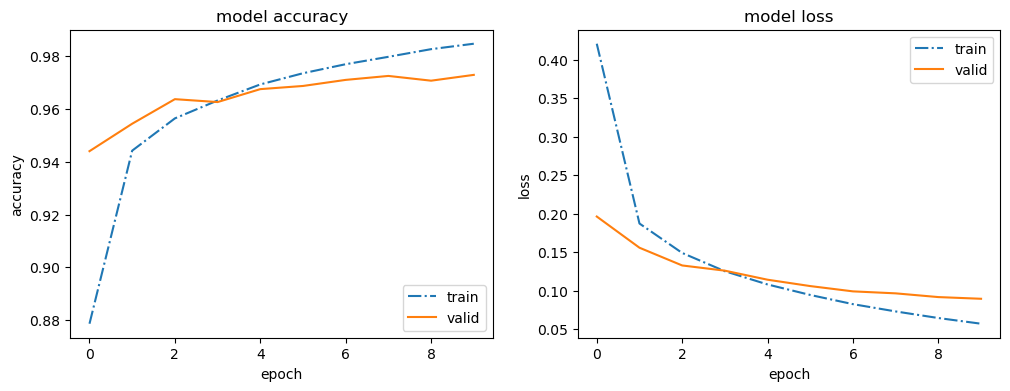

In [21]:
draw_hist_f(history2)

Now, let's use the fcNN that was trained on the shuffled data to predict new unseen data (our testdata).

In [22]:
evaluate_predictions_f(fcNN_model, X_test_shuffle_flat,Y_test )  

[[ 968    0    1    2    0    1    4    1    1    2]
 [   0 1122    3    1    0    1    3    0    5    0]
 [   3    1 1011    3    1    0    3    5    4    1]
 [   0    0    4  991    0    2    0    6    4    3]
 [   0    0    5    1  954    1    5    0    1   15]
 [   2    0    0   13    2  857    9    1    5    3]
 [   7    2    0    1    7    4  934    0    3    0]
 [   1    4   10    5    1    0    0  991    1   15]
 [   3    0    5    9    2    5    5    3  939    3]
 [   2    6    1   11   12    3    1    4    4  965]]
Acc_fc_orig_flat =  0.9732


>Note that in a fcNN the order of the data does not matter! The performace is the same if we use the original data for training and testing or if we use the shuffled data for the training and testing. In both cases the accuracy is around 96%.

# CNN as classification model for MNIST data

Now, let's do the same game with a CNN. We train a CNN to classify the MNIST data. We use the same netwok architecture and train first with the original data and then with the shuffled data. 
* Use a CNN with 2 convolution blocks and 2 fully connected layers as classification model
* train it once on the original train data and check the performance on the original test data
* train it once on the shuffeled train data and check the performance on the accordingly shuffled test data

## Define a CNN model to apply for both of the original and pixel-shuffled data

In [27]:
# here we define hyperparameter of the CNN
batch_size = 128
nb_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
pool_size = (2, 2)

In [28]:
# STEP 1: define CNN with 2 convolution blocks and 2 fully connected layers
# CNN_model = Sequential()

# CNN_model.add(Convolution2D(8,kernel_size,padding='same',input_shape=input_shape))
# CNN_model.add(Activation('relu'))
# CNN_model.add(Convolution2D(8, kernel_size,padding='same'))
# CNN_model.add(Activation('relu'))
# CNN_model.add(MaxPooling2D(pool_size=pool_size))

# CNN_model.add(Convolution2D(16, kernel_size,padding='same'))
# CNN_model.add(Activation('relu'))
# CNN_model.add(Convolution2D(16,kernel_size,padding='same'))
# CNN_model.add(Activation('relu'))
# CNN_model.add(MaxPooling2D(pool_size=pool_size))

# CNN_model.add(Flatten())
# CNN_model.add(Dense(40))
# CNN_model.add(Activation('relu'))
# CNN_model.add(Dense(nb_classes))
# CNN_model.add(Activation('softmax'))

CNN_model = keras.Sequential([
    Convolution2D(8, kernel_size = (3, 3), padding = 'same', input_shape = input_shape, activation='relu'), 
    Convolution2D(8, kernel_size = (3, 3), padding = 'same', activation='relu'),
    MaxPooling2D(pool_size= (2,2)),
    
    Convolution2D(16, kernel_size = (3, 3), padding='same', activation='relu'),
    Convolution2D(16, kernel_size = (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size= (2,2)),
    
    Flatten(), 
    Dense(40, activation = 'relu'), 
    Dense(10, activation = 'softmax')])

# STEP 2: compile model and intitialize weights
CNN_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
# summarize model along with number of model weights
CNN_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

## Train and evaluate  a CNN on the original data

In [30]:
# check the shape of the orginal data # we need matrices as input
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

((50000, 28, 28, 1), (50000, 10), (10000, 28, 28, 1), (10000, 10))

#### Listing 2.6 A CNN for MNIST classification                                                                                                                     

In [31]:
# train the model
org_CNN_history=CNN_model.fit(X_train, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val, Y_val))

Epoch 1/10
391/391 - 21s - loss: 0.3571 - accuracy: 0.8914 - val_loss: 0.1132 - val_accuracy: 0.9672
Epoch 2/10
391/391 - 19s - loss: 0.0890 - accuracy: 0.9731 - val_loss: 0.0648 - val_accuracy: 0.9810
Epoch 3/10
391/391 - 20s - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.0581 - val_accuracy: 0.9834
Epoch 4/10
391/391 - 27s - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0542 - val_accuracy: 0.9845
Epoch 5/10
391/391 - 34s - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0534 - val_accuracy: 0.9839
Epoch 6/10
391/391 - 36s - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0473 - val_accuracy: 0.9863
Epoch 7/10
391/391 - 30s - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0446 - val_accuracy: 0.9885
Epoch 8/10
391/391 - 29s - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0509 - val_accuracy: 0.9861
Epoch 9/10
391/391 - 24s - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0488 - val_accuracy: 0.9873
Epoch 10/10
391/391 - 28s - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0498 - val_accura

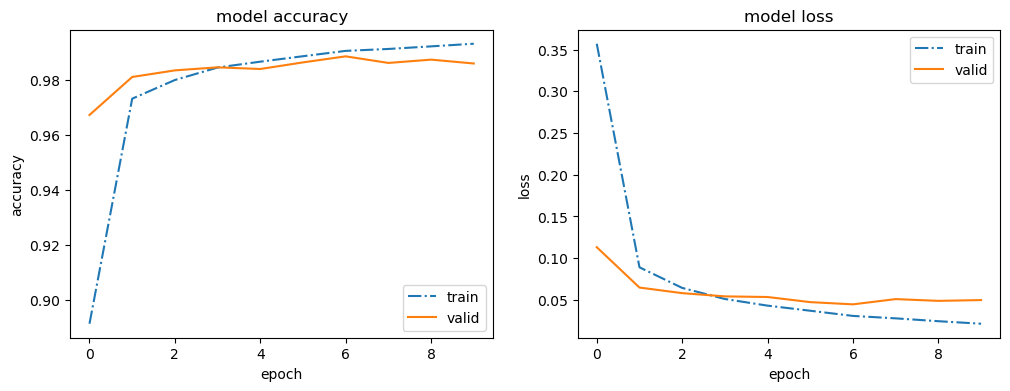

In [32]:
# plot the development of the accuracy and loss during training
draw_hist_f(org_CNN_history)

Now, let's use CNN that was trained on the original data to predict new unseen data (our testdata). 

In [33]:
evaluate_predictions_f(CNN_model, X_test,Y_test )  

[[ 975    0    1    1    0    0    1    0    2    0]
 [   0 1128    4    0    0    2    0    0    1    0]
 [   0    0 1029    0    0    0    0    2    1    0]
 [   0    0    4 1000    0    4    0    0    1    1]
 [   0    0    2    0  962    0    5    1    6    6]
 [   1    0    0   10    0  878    1    0    1    1]
 [   3    2    1    0    1    3  944    0    4    0]
 [   0    3   10    4    0    1    0 1008    1    1]
 [   3    0    1    5    0    1    0    1  962    1]
 [   0    3    0    4    2    5    0    1    8  986]]
Acc_fc_orig_flat =  0.9872


### Train the CNN on the shuffled data

In [34]:
# check the shape of the shuffled data
X_train_shuffle.shape,Y_train.shape,X_val_shuffle.shape,Y_val.shape

((50000, 28, 28, 1), (50000, 10), (10000, 28, 28, 1), (10000, 10))

In [35]:
# train the model
shuf_CNN_history=CNN_model.fit(X_train_shuffle, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val_shuffle, Y_val))

Epoch 1/10
391/391 - 21s - loss: 0.6556 - accuracy: 0.8011 - val_loss: 0.2997 - val_accuracy: 0.9112
Epoch 2/10
391/391 - 20s - loss: 0.2784 - accuracy: 0.9151 - val_loss: 0.2382 - val_accuracy: 0.9254
Epoch 3/10
391/391 - 22s - loss: 0.2225 - accuracy: 0.9325 - val_loss: 0.2151 - val_accuracy: 0.9336
Epoch 4/10
391/391 - 30s - loss: 0.1878 - accuracy: 0.9426 - val_loss: 0.1932 - val_accuracy: 0.9411
Epoch 5/10
391/391 - 35s - loss: 0.1651 - accuracy: 0.9484 - val_loss: 0.1903 - val_accuracy: 0.9421
Epoch 6/10
391/391 - 33s - loss: 0.1445 - accuracy: 0.9547 - val_loss: 0.1867 - val_accuracy: 0.9430
Epoch 7/10
391/391 - 26s - loss: 0.1312 - accuracy: 0.9592 - val_loss: 0.1823 - val_accuracy: 0.9464
Epoch 8/10
391/391 - 23s - loss: 0.1146 - accuracy: 0.9637 - val_loss: 0.1879 - val_accuracy: 0.9451
Epoch 9/10
391/391 - 21s - loss: 0.1067 - accuracy: 0.9659 - val_loss: 0.1787 - val_accuracy: 0.9488
Epoch 10/10
391/391 - 21s - loss: 0.0948 - accuracy: 0.9691 - val_loss: 0.1848 - val_accura

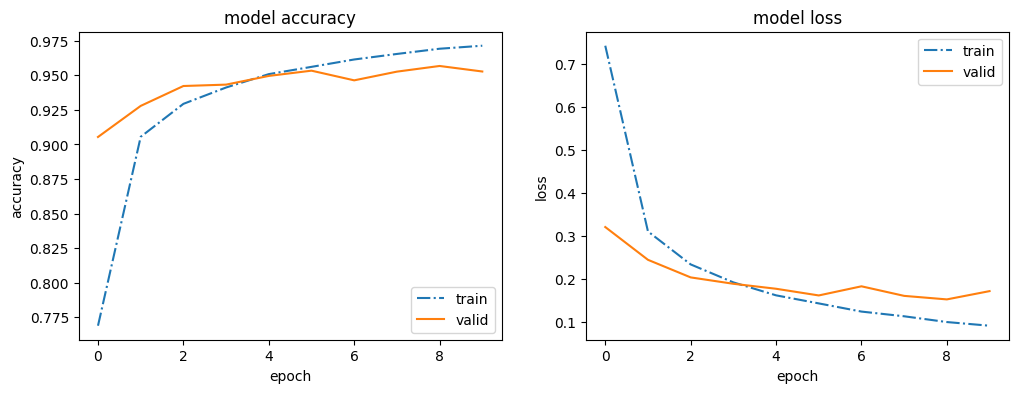

In [31]:
# plot the development of the accuracy and loss during training
draw_hist_f(shuf_CNN_history)

Use the CNN that was trained on the shuffled data to predict new unseen data (our testdata). 

In [32]:
pred=model.predict(X_test_shuffle)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc_shuffled = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc_fc_shuffled = " , acc_fc_shuffled)

evaluate_predictions_f(CNN_model, X_test_shuffle, Y_test )  

[[ 965    0    2    0    0    6    2    4    1    0]
 [   0 1109    3    1    0    1    6    3   12    0]
 [   6    0 1001    2    0    1    6   10    6    0]
 [   1    0   19  924    0   31    0    8   24    3]
 [   8    0    7    0  908    2    8   14    8   27]
 [   5    0    2   13    1  853    4    2   11    1]
 [  11    1    4    0    3   14  912    3   10    0]
 [   2    1   11    3    0    1    0 1000    3    7]
 [   2    0   10    6    1   14    2    6  931    2]
 [   4    3    4    4   12    9    0   30   17  926]]
Acc_fc_shuffled =  0.9529


# Conclusion

***In a CNN the order of the data does matter, the performace for the original images and for the shuffled are the different! The CNN performs better on the original data. The CNN trained on the original data achieved an accuracy of  99%, but the same CNN trained on the shuffled version of the data achieved only 95% accuracy.***

Note that the shuffling here is the shuffling for pixels in images. The reason why the order of pixels is important in CNN model is because CNN consider the relationship of nearby pixels in a neighorhood.  
This was not the case when we used fcNN - here the performance did not change if the data was shuffled. The fcNN achieved an accuracy of 96% regardless if the data was shuffled or not.

***It is worth to note that the CNN with "only" 35'962 model weights achieved a higher accuracy 99% than the fcNN with 84'060 model weights that achieved a smaller accuray 96%***
